In [2]:
import numpy as np
import pandas as pd


In [3]:
dataset = pd.read_csv('species.csv')
df = pd.DataFrame(dataset)
df

,Species,Green,Legs,Height,Smelly
0,Martian,No,3,Short,Yes
1,Martian,Yes,2,Tall,No
2,Martian,Yes,3,Tall,No
3,Martian,No,2,Short,Yes
4,Martian,Yes,3,Tall,No
5,Human,No,2,Tall,Yes
6,Human,No,2,Short,No
7,Human,No,2,Tall,No
8,Human,Yes,2,Short,No
9,Human,No,2,Tall,Yes


In [4]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
print(X)
print(y)

[['No' 3 'Short' 'Yes']
 ['Yes' 2 'Tall' 'No']
 ['Yes' 3 'Tall' 'No']
 ['No' 2 'Short' 'Yes']
 ['Yes' 3 'Tall' 'No']
 ['No' 2 'Tall' 'Yes']
 ['No' 2 'Short' 'No']
 ['No' 2 'Tall' 'No']
 ['Yes' 2 'Short' 'No']
 ['No' 2 'Tall' 'Yes']]
['Martian' 'Martian' 'Martian' 'Martian' 'Martian' 'Human' 'Human' 'Human'
 'Human' 'Human']


In [5]:
df_encoded = pd.get_dummies(df.drop(columns=['Species']))
target = df['Species']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded,y, test_size=0.33, random_state=324)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
clf = DecisionTreeClassifier(criterion='gini',random_state=42)

clf.fit(df_encoded,target)


DecisionTreeClassifier(random_state=42)

In [9]:
new_data_point = pd.DataFrame({
    'Green': ["Yes"],
    'Legs': [2],
    'Height': ["Tall"],
    'Smelly': ["No"]
})
new_data_encoded = pd.get_dummies(new_data_point)

# Ensure the new data has the same columns as the training data after one-hot encoding
missing_cols = set(df_encoded.columns) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0

# Reorder columns to match the order of columns in the training data
new_data_encoded = new_data_encoded[df_encoded.columns]

# Make predictions
predicted_species = clf.predict(new_data_encoded)
print("Predicted Species:", predicted_species)


Predicted Species: ['Martian']


In [10]:
from sklearn import tree
print(tree.export_text(clf))

|--- feature_0 <= 2.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- class: Human
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- class: Martian
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: Human
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: Martian
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: Human
|--- feature_0 >  2.50
|   |--- class: Martian



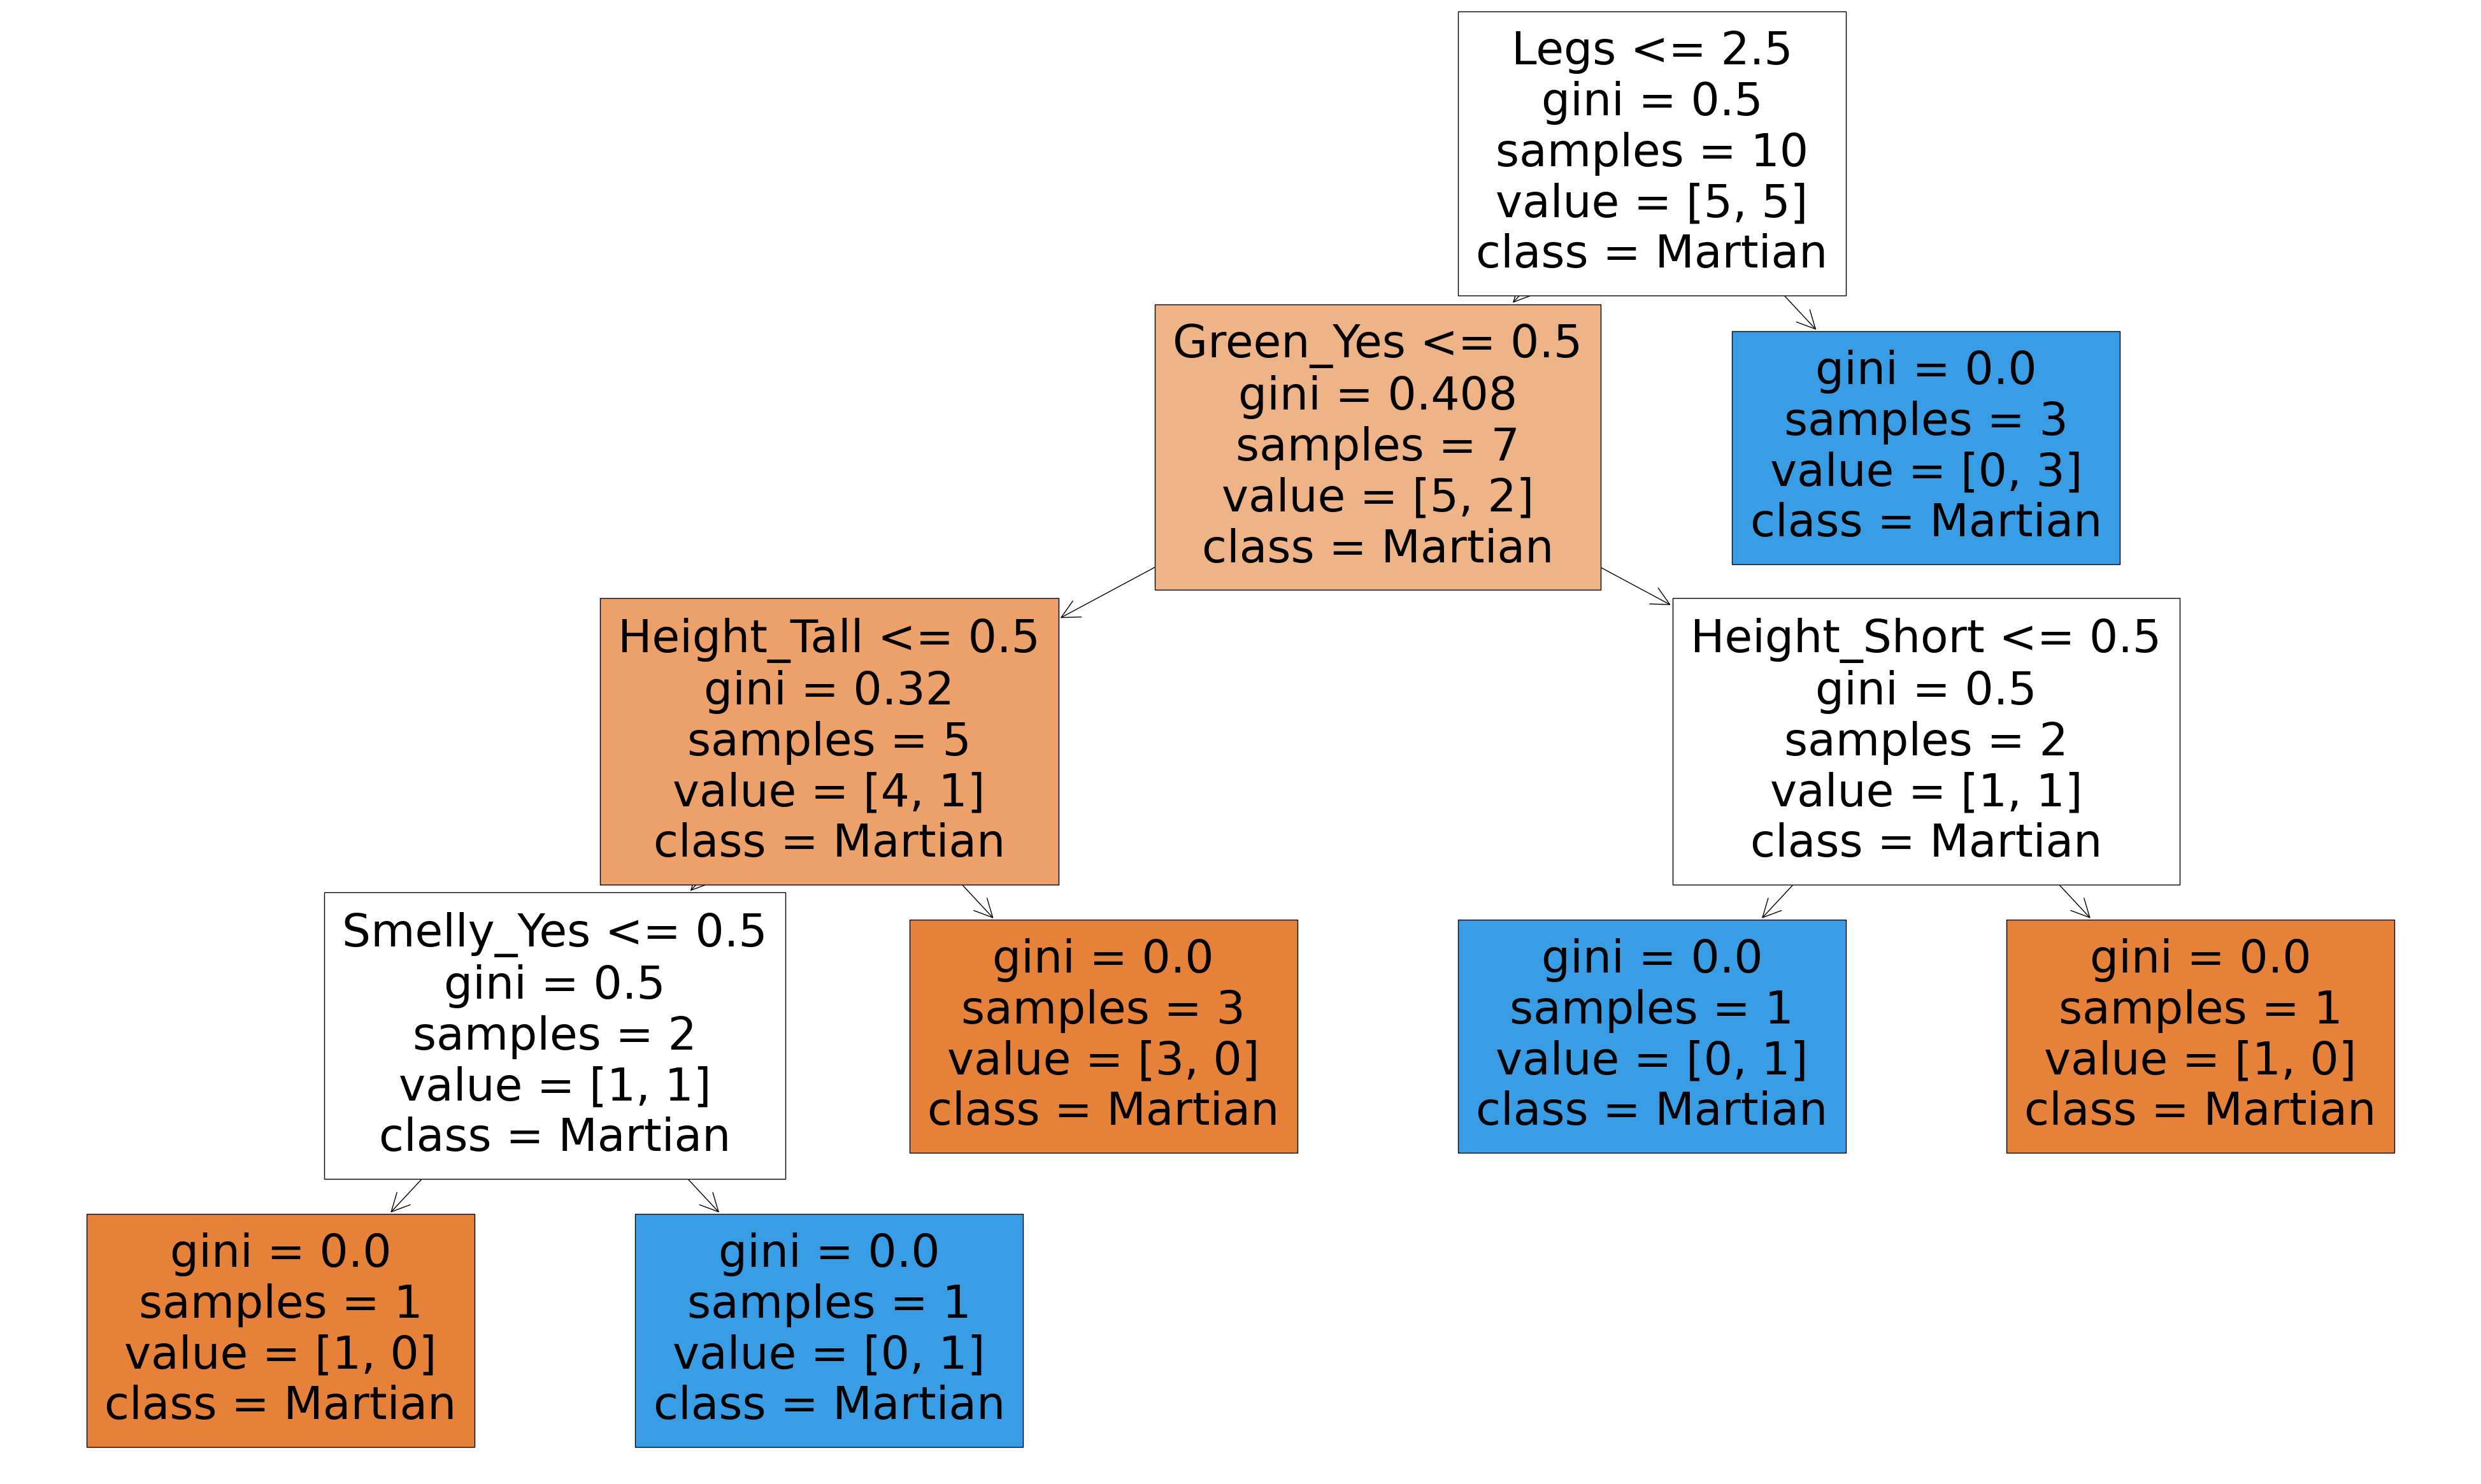

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,30))

_ = tree.plot_tree(clf,feature_names=df_encoded.columns,class_names=target,filled=True)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming clf is your trained classifier and X_test, y_test are your test data
# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[2 0]
 [0 2]]
